In [54]:
pip install pandas numpy matplotlib seaborn nltk scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
df = pd.read_csv('use this.csv')
print("CSV file successfully loaded.")

CSV file successfully loaded.


In [11]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [74]:
def preprocess_text(text):
text = text.lower()
text = re.sub(r'[^a-zA-Z\s]', '', text)
tokens = word_tokenize(text)
processed_tokens = [
lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
    ]
return ' '.join(processed_tokens)

In [78]:
import nltk
print("Attempting to download NLTK 'punkt_tab'...")
try:
nltk.data.find('tokenizers/punkt_tab')
except:
nltk.download('punkt_tab')
print("'punkt_tab' download complete.")
else:
print("'punkt_tab' already exists.")

print("\nAll necessary NLTK data check/download complete.")

Attempting to download NLTK 'punkt_tab'...


[nltk_data] Downloading package punkt_tab to /Users/whb/nltk_data...


'punkt_tab' download complete.

All necessary NLTK data check/download complete.


[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [80]:
print("\n--- Re-applying text preprocessing to ensure up-to-date state... ---")
df['processed_text'] = df['reviews.text'].apply(preprocess_text)
print("Text preprocessing completed.")


--- Re-applying text preprocessing to ensure up-to-date state... ---
Text preprocessing completed.


In [82]:
print("\n--- Sample of Processed Text ---")
print(df[['reviews.text', 'processed_text']].head())


--- Sample of Processed Text ---
                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                      processed_text  
0  product far disappointed child love use like a...  
1  great beginner experienced person bought gift ...  
2  inexpensive tablet use learn step nabi thrille...  
3  ive fire hd two week love tablet great valuewe...  
4  bought grand daughter come visit set user ente...  


In [84]:
print("\n--- Performing initial sentiment analysis (Scoring method & VADER) ---")

def get_sentiment_from_rating(rating):
if rating >= 4:
return 'Positive'
elif rating == 3:
return 'Neutral'
else:
return 'Negative'

df['rating_sentiment'] = df['reviews.rating'].apply(get_sentiment_from_rating)

print("\n--- Rating-based Sentiment Distribution ---")
print(df['rating_sentiment'].value_counts())

try:
nltk.data.find('sentiment/vader_lexicon')
except:
print("\nDownloading NLTK 'vader_lexicon'...")
nltk.download('vader_lexicon')
print("'vader_lexicon' download complete.")
else:
print("\n'vader_lexicon' already exists.")

sid = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
if pd.isna(text):
return None
return sid.polarity_scores(text)['compound']

df['vader_compound_score'] = df['processed_text'].apply(get_vader_sentiment)

def get_vader_sentiment_label(score):
if score is None:
return None
elif score >= 0.05:
return 'Positive'
elif score <= -0.05:
return 'Negative'
else:
return 'Neutral'

df['vader_sentiment_label'] = df['vader_compound_score'].apply(get_vader_sentiment_label)

print("\n--- Sample of VADER Sentiment Scores and Labels ---")
print(df[['reviews.text', 'processed_text', 'reviews.rating', 'rating_sentiment', 'vader_compound_score', 'vader_sentiment_label']].head())

print("\n--- VADER Sentiment Label Distribution ---")
print(df['vader_sentiment_label'].value_counts())


--- Performing initial sentiment analysis (Scoring method & VADER) ---

--- Rating-based Sentiment Distribution ---
rating_sentiment
Positive    1104
Negative      27
Neutral       26
Name: count, dtype: int64

'vader_lexicon' download complete.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/whb/nltk_data...



--- Sample of VADER Sentiment Scores and Labels ---
                                        reviews.text  \
0  This product so far has not disappointed. My c...   
1  great for beginner or experienced person. Boug...   
2  Inexpensive tablet for him to use and learn on...   
3  I've had my Fire HD 8 two weeks now and I love...   
4  I bought this for my grand daughter when she c...   

                                      processed_text  reviews.rating  \
0  product far disappointed child love use like a...               5   
1  great beginner experienced person bought gift ...               5   
2  inexpensive tablet use learn step nabi thrille...               5   
3  ive fire hd two week love tablet great valuewe...               4   
4  bought grand daughter come visit set user ente...               5   

  rating_sentiment  vader_compound_score vader_sentiment_label  
0         Positive                0.8126              Positive  
1         Positive                0.9042       


--- Starting Initial Visualizations ---
Rating-based sentiment distribution chart generated.
VADER sentiment label distribution chart generated.


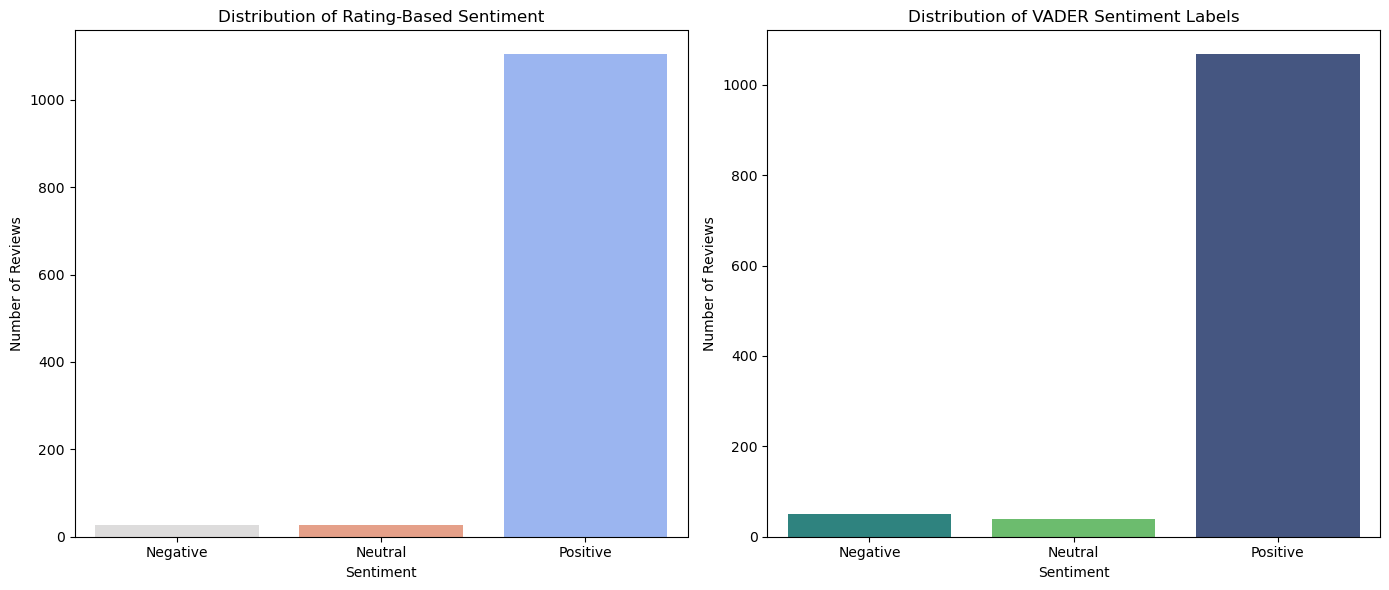

In [110]:
print("\n--- Starting Initial Visualizations ---")


plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.countplot(x='rating_sentiment', hue='rating_sentiment', data=df, palette='coolwarm', order=['Negative', 'Neutral', 'Positive'], legend=False)
plt.title('Distribution of Rating-Based Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
print("Rating-based sentiment distribution chart generated.")


plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.countplot(x='vader_sentiment_label', hue='vader_sentiment_label', data=df, palette='viridis', order=['Negative', 'Neutral', 'Positive'], legend=False)
plt.title('Distribution of VADER Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
print("VADER sentiment label distribution chart generated.")

plt.tight_layout() 
plt.show()

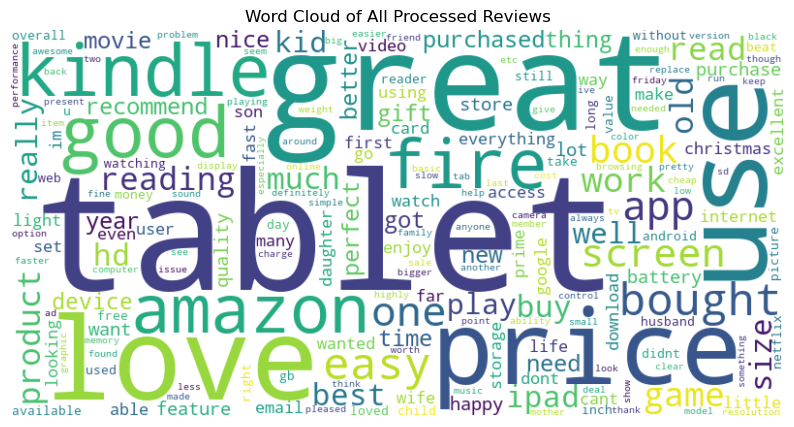

Word cloud generated for all processed reviews.

Initial Visualizations completed.


In [106]:
from wordcloud import WordCloud
all_words = ' '.join(df['processed_text'].dropna().tolist())


if all_words:
    
wordcloud = WordCloud(width=800, height=400, background_color='white',
collocations=False, 
min_font_size=10).generate(all_words)

    
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.title('Word Cloud of All Processed Reviews')
plt.show()
print("Word cloud generated for all processed reviews.")
else:
print("No processed text available to generate a word cloud.")
print("\nInitial Visualizations completed.")

In [104]:
!pip install wordcloud

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from gensim import corpora, models
import warnings

In [3]:

warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
print("--- Starting Data Processing Pipeline ---")

In [15]:
try:
df = pd.read_csv('use this.csv')
df.dropna(subset=['reviews.text', 'reviews.rating', 'reviews.date', 'categories'], inplace=True)
print(f"Loaded and cleaned data. Total rows: {df.shape[0]}")
except FileNotFoundError:
print("Error: 'use this.csv' not found.")
exit()

Loaded and cleaned data. Total rows: 1157


In [25]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [35]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text)
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(processed_tokens)

In [37]:
df['processed_text'] = df['reviews.text'].apply(preprocess_text)
print("Text preprocessing completed.")

Text preprocessing completed.


In [41]:
def get_sentiment_from_rating(rating):
    if rating >= 4: return 'Positive'
    elif rating == 3: return 'Neutral'
    else: return 'Negative'
    df['rating_sentiment'] = df['reviews.rating'].apply(get_sentiment_from_rating)


In [43]:
sid = SentimentIntensityAnalyzer()
df['vader_compound_score'] = df['processed_text'].apply(lambda x: sid.polarity_scores(x)['compound'] if x else 0)
def get_vader_sentiment_label(score):
    if score >= 0.05: return 'Positive'
    elif score <= -0.05: return 'Negative'
    else: return 'Neutral'
df['vader_sentiment_label'] = df['vader_compound_score'].apply(get_vader_sentiment_label)
print("Sentiment labels (Rating & VADER) created.")


Sentiment labels (Rating & VADER) created.


In [45]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, min_df=5, max_df=0.9)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()
print("TF-IDF vectorization completed.")


TF-IDF vectorization completed.



--- Final Sentiment Comparison ---
Overall agreement between Rating and VADER: 89.54%


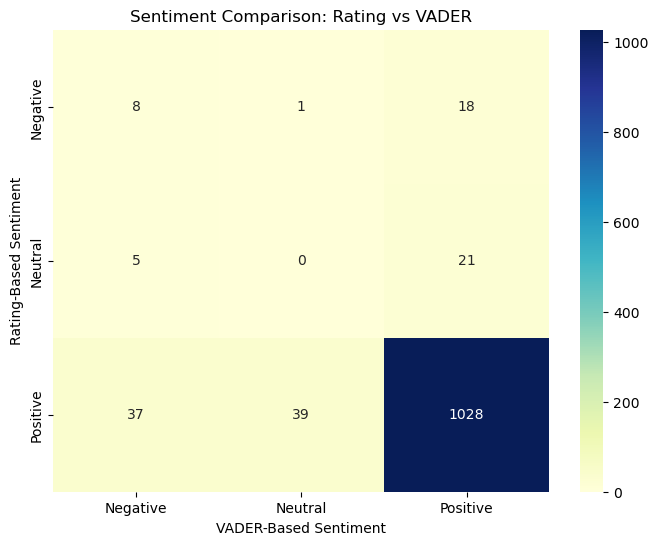

In [47]:
print("\n--- Final Sentiment Comparison ---")
sentiment_comparison = pd.crosstab(df['rating_sentiment'], df['vader_sentiment_label'])
agreement = (df['rating_sentiment'] == df['vader_sentiment_label']).mean()
print(f"Overall agreement between Rating and VADER: {agreement:.2%}")
plt.figure(figsize=(8, 6))
sns.heatmap(sentiment_comparison, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Sentiment Comparison: Rating vs VADER')
plt.ylabel('Rating-Based Sentiment')
plt.xlabel('VADER-Based Sentiment')
plt.show()

In [49]:
print("\n--- LDA Topic Modeling on Negative Reviews ---")
negative_reviews_df = df[df['rating_sentiment'] == 'Negative'].copy()
negative_texts = [text.split() for text in negative_reviews_df['processed_text']]
dictionary = corpora.Dictionary(negative_texts)
corpus = [dictionary.doc2bow(text) for text in negative_texts]
num_topics = 5
if corpus:
    lda_model = models.LdaMulticore(corpus, num_topics=num_topics, id2word=dictionary, passes=10, workers=4)
    print(f"LDA model trained on {num_topics} topics for negative reviews.")
    for idx, topic in lda_model.print_topics(-1):
        print(f"Topic: {idx} \nWords: {topic}\n")
else:
    print("No negative reviews found for LDA topic modeling.")



--- LDA Topic Modeling on Negative Reviews ---
LDA model trained on 5 topics for negative reviews.
Topic: 0 
Words: 0.021*"one" + 0.017*"tablet" + 0.017*"good" + 0.017*"amazon" + 0.013*"another" + 0.013*"time" + 0.013*"even" + 0.013*"trying" + 0.013*"computer" + 0.009*"charge"

Topic: 1 
Words: 0.031*"tablet" + 0.026*"amazon" + 0.016*"apps" + 0.016*"product" + 0.011*"work" + 0.011*"want" + 0.011*"great" + 0.011*"use" + 0.011*"basic" + 0.011*"shop"

Topic: 2 
Words: 0.022*"one" + 0.017*"good" + 0.017*"go" + 0.016*"screen" + 0.011*"bought" + 0.011*"next" + 0.011*"us" + 0.011*"want" + 0.011*"game" + 0.011*"time"

Topic: 3 
Words: 0.027*"use" + 0.023*"apps" + 0.014*"one" + 0.014*"get" + 0.014*"ipad" + 0.014*"much" + 0.010*"kind" + 0.010*"back" + 0.010*"liked" + 0.010*"bought"

Topic: 4 
Words: 0.021*"store" + 0.017*"didnt" + 0.017*"play" + 0.013*"kid" + 0.013*"make" + 0.013*"bought" + 0.013*"tried" + 0.013*"work" + 0.013*"app" + 0.013*"version"




--- Expanded Visualizations ---


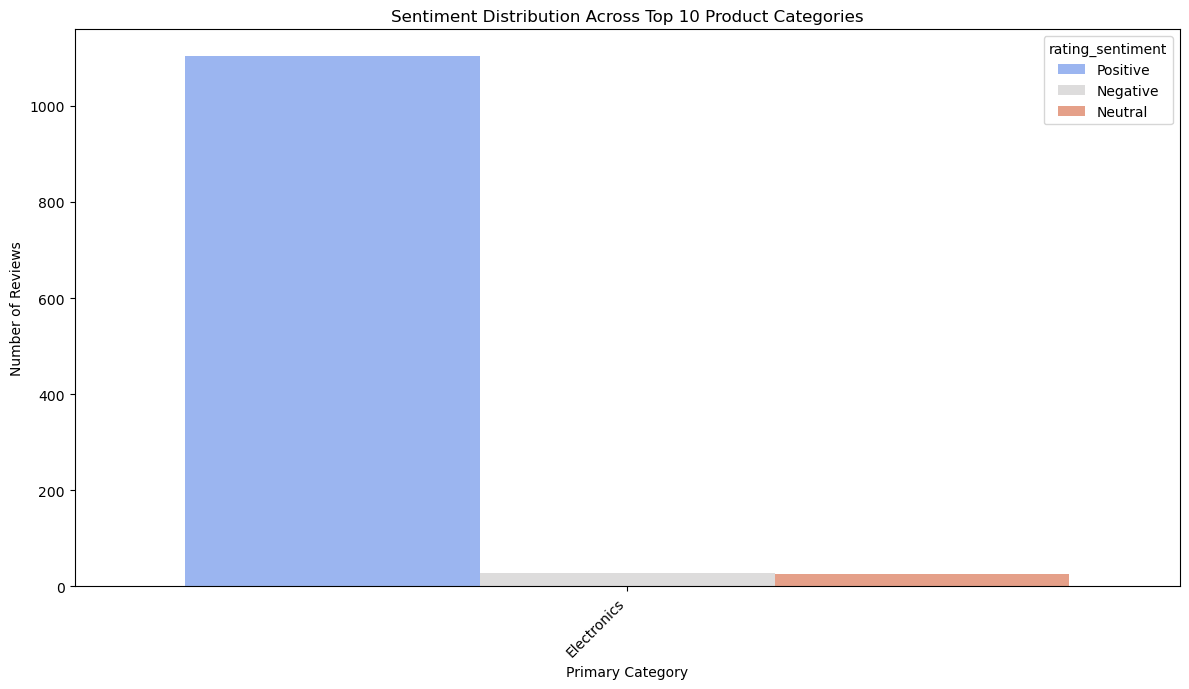

In [51]:
print("\n--- Expanded Visualizations ---")
df['primary_category'] = df['categories'].apply(lambda x: x.split(',')[0].strip() if pd.notna(x) else 'Other')
top_categories = df['primary_category'].value_counts().nlargest(10).index
df_filtered_cat = df[df['primary_category'].isin(top_categories)]
plt.figure(figsize=(12, 7))
sns.countplot(data=df_filtered_cat, x='primary_category', hue='rating_sentiment', palette='coolwarm')
plt.title('Sentiment Distribution Across Top 10 Product Categories')
plt.xlabel('Primary Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [57]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

<Figure size 1500x700 with 0 Axes>

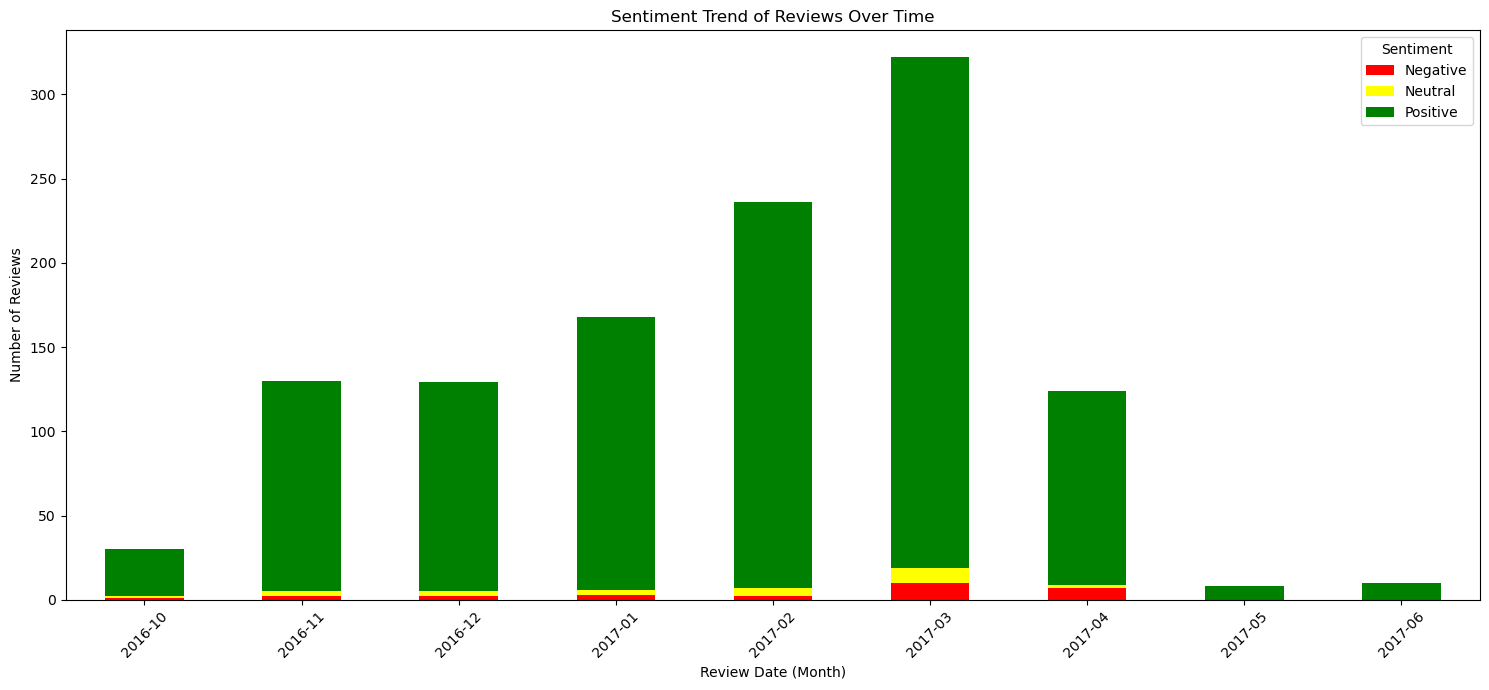

In [59]:
df['reviews.date'] = pd.to_datetime(df['reviews.date'])
df['review_month'] = df['reviews.date'].dt.to_period('M')
sentiment_over_time = df.groupby(['review_month', 'rating_sentiment']).size().unstack(fill_value=0)
sentiment_over_time.index = sentiment_over_time.index.astype(str)
plt.figure(figsize=(15, 7))
sentiment_over_time.plot(kind='bar', stacked=True, figsize=(15, 7), color=['red', 'yellow', 'green'])
plt.title('Sentiment Trend of Reviews Over Time')
plt.xlabel('Review Date (Month)')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

